<a href="https://colab.research.google.com/github/PraveenGill/Project/blob/main/Titanic__survival_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [104]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Titanic Survival Prediction**
in this task we predict the survival chances of the Titanic passengers using the given information about their sex, age, etc. As this is a classification task we will be using random forest.

#**Importing Required Libraries**

In [105]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

#**Loading the Dataset**

In [106]:
training_data = pd.read_csv('/content/drive/MyDrive/Dataset/titanic-training-data.csv')
testing_data = pd.read_csv('/content/drive/MyDrive/Dataset/tested.csv')

#**Knowing about dataset**

In [107]:
training_data.shape

(891, 12)

In [108]:
training_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [109]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [110]:
training_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Visualizing data to get insights about data


<Axes: xlabel='Survived', ylabel='count'>

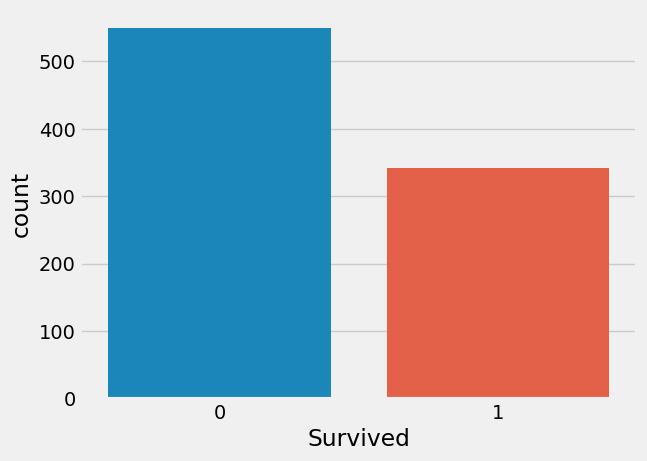

In [111]:
sns.countplot(x='Survived', data=training_data)

<Axes: xlabel='Sex', ylabel='count'>

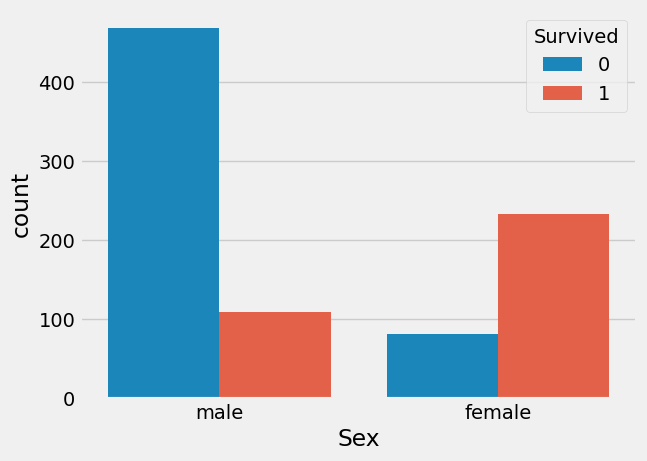

In [112]:
sns.countplot(x='Sex', hue='Survived',data=training_data)

# **Data Pre-processing**
In this process we will clean our data by deleting unnecessary columns, handling missing values, mapping the qualititative values to numeric values or standardization to numeric values etc.

# Converting Quatlitative values to numeric values and deleting unrequired attributes

In [113]:
training_data["CabinBool"] = (training_data["Cabin"].notnull().astype('int'))
testing_data["CabinBool"] = (testing_data["Cabin"].notnull().astype('int'))

training_data = training_data.drop(['Cabin'], axis=1)
testing_data = testing_data.drop(['Cabin'], axis=1)

In [114]:
training_data = training_data.drop(['Ticket'], axis=1)
testing_dat = testing_data.drop(['Ticket'], axis=1)

# Handling Missing Values
Above we saw somee of our data attributes, like *Age*, *Cabin* and *Embarked* contains missing values, which need to be opreated. To handle missing data either we can delete the attribute if not much cotributing to the output or impute a value to it.

We had already deleted the *Cabin* attribute from our data so we need to handle rest of two. let's impute some values like mean, mode or other standard value.

In [115]:
training_data = training_data.fillna({"Embarked": "S"})

Sorting data logically based on age to impute values in missing cells of *Age* attribute

In [116]:
training_data["Age"] = training_data["Age"].fillna(-0.5)
testing_data["Age"] = testing_data["Age"].fillna(-0.5)
bins = [-1, 0, 5, 12, 18, 24, 35, 60, np.inf]
labels = ['Unknown', 'Baby', 'Child', 'Teenager','Student', 'Young Adult', 'Adult', 'Senior']
training_data['AgeGroup'] = pd.cut(training_data["Age"], bins, labels=labels)
testing_data['AgeGroup'] = pd.cut(testing_data["Age"], bins, labels=labels)

In [117]:
training_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,CabinBool,AgeGroup
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,0,Student
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,1,Adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,0,Young Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,1,Young Adult
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,0,Young Adult


# Standardizing and mapping the values the data

In [118]:
df1 = [training_data, testing_data]
for data1 in df1:
	data1['Title'] = data1.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
pd.crosstab(training_data['Title'], training_data['Sex'])

for data1 in df1:
	data1['Title'] = data1['Title'].replace(['Lady', 'Capt', 'Col','Don', 'Dr', 'Major','Rev', 'Jonkheer', 'Dona'],'Rare')
	data1['Title'] = data1['Title'].replace(['Countess', 'Lady', 'Sir'], 'Royal')
	data1['Title'] = data1['Title'].replace('Mlle', 'Miss')
	data1['Title'] = data1['Title'].replace('Ms', 'Miss')
	data1['Title'] = data1['Title'].replace('Mme', 'Mrs')

training_data[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

maptitle = {"Mr": 1, "Miss": 2, "Mrs": 3,"Master": 4, "Royal": 5, "Rare": 6}
for data1 in df1:
	data1['Title'] = data1['Title'].map(maptitle)
	data1['Title'] = data1['Title'].fillna(0)

In [119]:
mode_mr_age = training_data[training_data["Title"] == 1]["AgeGroup"].mode() # Young Adult
mode_miss_age = training_data[training_data["Title"] == 2]["AgeGroup"].mode() # Student
mode_mrs_age = training_data[training_data["Title"] == 3]["AgeGroup"].mode() # Adult
mode_master_age = training_data[training_data["Title"] == 4]["AgeGroup"].mode() # Baby
mode_royal_age = training_data[training_data["Title"] == 5]["AgeGroup"].mode() # Adult
mode_rare_age = training_data[training_data["Title"] == 6]["AgeGroup"].mode() # Adult

mapagetitle = {1: "Young Adult", 2: "Student",3: "Adult", 4: "Baby", 5: "Adult", 6: "Adult"}
for x in range(len(training_data["AgeGroup"])):
	if training_data["AgeGroup"][x] == "Unknown":
		training_data["AgeGroup"][x] = mapagetitle[training_data["Title"][x]]

for x in range(len(testing_data["AgeGroup"])):
	if testing_data["AgeGroup"][x] == "Unknown":
		testing_data["AgeGroup"][x] = mapagetitle[testing_data["Title"][x]]

# Mapping values

In [120]:

mapage = {'Baby': 1, 'Child': 2, 'Teenager': 3,'Student': 4, 'Young Adult': 5, 'Adult': 6,'Senior': 7}
training_data['AgeGroup'] = training_data['AgeGroup'].map(mapage)
testing_data['AgeGroup'] = testing_data['AgeGroup'].map(mapage)

training_data.head()

training_data = training_data.drop(['Age'],axis=1)
testing_data = testing_data.drop(['Age'], axis=1)

In [121]:
training_data = training_data.drop(['Name'], axis=1)
testing_data = testing_data.drop(['Name'], axis=1)

In [122]:
mapsex = {"male": 0, "female": 1}
training_data['Sex'] = training_data['Sex'].map(mapsex)
testing_data['Sex'] = testing_data['Sex'].map(mapsex)

mapembarked = {"S": 1, "C": 2, "Q": 3}
training_data['Embarked'] = training_data['Embarked'].map(mapembarked)
testing_data['Embarked'] = testing_data['Embarked'].map(mapembarked)

In [123]:
for x in range(len(testing_data["Fare"])):
	if pd.isnull(testing_data["Fare"][x]):
		pclass = testing_data["Pclass"][x]
		testing_data["Fare"][x] = round(training_data[training_data["Pclass"] == pclass]["Fare"].mean(), 4)

training_data['FareBand'] = pd.qcut(training_data['Fare'], 4,labels=[1, 2, 3, 4])
testing_data['FareBand'] = pd.qcut(testing_data['Fare'], 4,labels=[1, 2, 3, 4])

training_data = training_data.drop(['Fare'], axis=1)
testing_data = testing_data.drop(['Fare'], axis=1)

<ipython-input-123-18afc19e3f46>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testing_data["Fare"][x] = round(training_data[training_data["Pclass"] == pclass]["Fare"].mean(), 4)


# Target and Feature spliting and Training and Testing Spliting of Data

In [124]:
from sklearn.model_selection import train_test_split

predictors = training_data.drop(['Survived', 'PassengerId'], axis=1)
target = training_data["Survived"]
x_train, x_val, y_train, y_val = train_test_split(predictors, target, test_size=0.2, random_state=0)

#Building Model

In [125]:
from sklearn.ensemble import RandomForestClassifier

randomforest = RandomForestClassifier()
randomforest.fit(x_train, y_train)

RandomForestClassifier()

#Model Evaluation

In [126]:
from sklearn.metrics import accuracy_score
y_pred = randomforest.predict(x_val)

acc_randomforest = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_randomforest)

84.92
